In [1]:
import pandas as pd
data = pd.read_csv('cleaned_data.csv')

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
feature_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

features = data[feature_columns]

features['ApplicantIncome'] = features['ApplicantIncome'].astype(float)

C:\Users\devas\AppData\Local\Temp\ipykernel_3732\2071350650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['ApplicantIncome'] = features['ApplicantIncome'].astype(float)


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

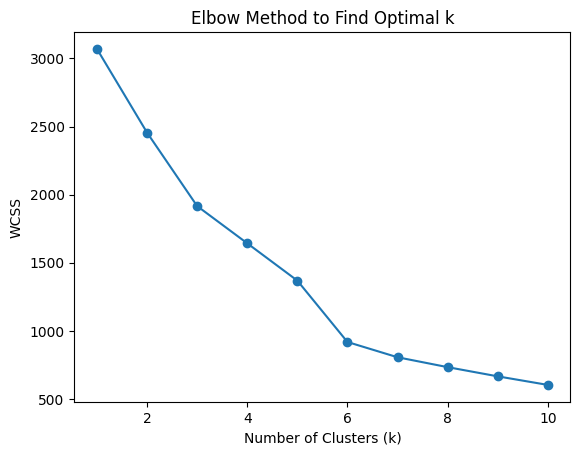

In [6]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal k')
plt.show()

Choosing Number of clusters = 7

In [7]:
kmeans = KMeans(n_clusters=3,random_state=42)
data['Cluster']= kmeans.fit_predict(scaled_features)

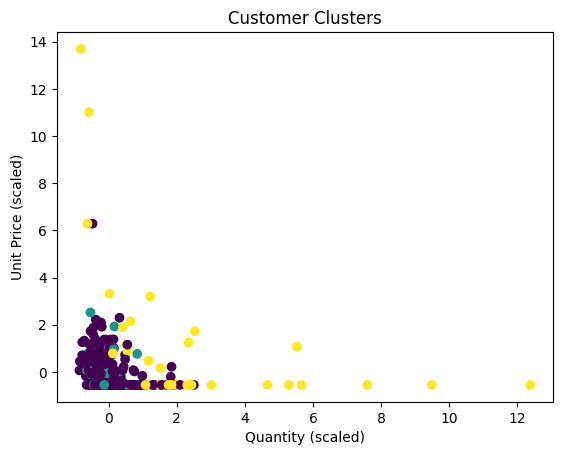

In [8]:
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=data['Cluster'],cmap='viridis')
plt.xlabel('Quantity (scaled)')
plt.ylabel('Unit Price (scaled)')
plt.title('Customer Clusters')
plt.show()

In [9]:
data[['Loan_ID','Cluster']].tail()

,Loan_ID,Cluster
609,LP002978,0
610,LP002979,0
611,LP002983,0
612,LP002984,0
613,LP002990,1


In [10]:
data.to_csv('data_with_clusters.csv',index=False)

ML model

In [11]:
import joblib
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
df = pd.read_csv('data_with_clusters.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster
0,LP001002,male,no,0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,Y,0
1,LP001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,N,0
2,LP001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,Y,0
3,LP001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,Y,0
4,LP001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,female,no,0,graduate,no,2900,0.0,71.0,360.0,1.0,rural,Y,0
610,LP002979,male,yes,3+,graduate,no,4106,0.0,40.0,180.0,1.0,rural,Y,0
611,LP002983,male,yes,1,graduate,no,8072,240.0,253.0,360.0,1.0,urban,Y,0
612,LP002984,male,yes,2,graduate,no,7583,0.0,187.0,360.0,1.0,urban,Y,0


In [13]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df['Married'] = df['Married'].map({'yes': 1, 'no': 0})
df['Education'] = df['Education'].map({'graduate': 1, 'not graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'yes': 1, 'no': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

le = LabelEncoder()
df['Property_Area'] = le.fit_transform(df['Property_Area'])

In [14]:
print(df.isnull().sum())
df = df.dropna()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Cluster              0
dtype: int64


In [15]:
X = df[['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Amount_Term', 'Cluster']]
Y = df['Loan_Status']

In [16]:
print(X.shape, Y.shape)  # Check dimensions of X and Y

(614, 10) (614,)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [20]:
Y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

In [22]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.326774193548387
Mean Squared Error: 0.20760967741935485
Root Mean Squared Error: 0.45564204966108524
R² Score: 0.07311080139372816


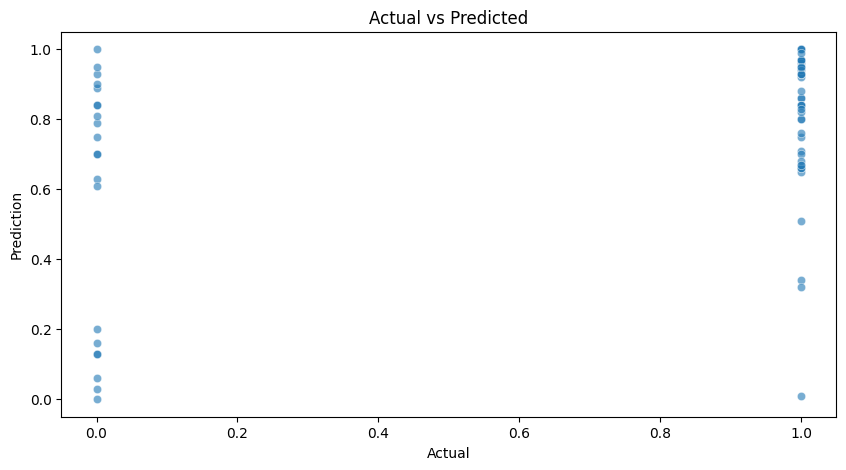

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Actual vs Predicted")
plt.show()

In [24]:
joblib.dump(model, "loan_prediction_model.pkl")

['loan_prediction_model.pkl']